In [2]:
import os
import numpy as np
import cv2
import glob
from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import segmentation_models as sm
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model


Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [3]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

width_shape, height_shape = 128, 128 

data_path_train = 'G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train'
data_path_test = 'G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/validation'

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0537.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0918.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0257.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0653.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0037.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0422.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0147.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0992.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0907.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0632.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0684.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0567.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0424.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0386.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0939.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0515.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0249.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0223.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0708.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0099.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0952.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0091.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0655.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0063.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0572.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0941.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0015.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0476.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0221.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0527.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0894.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0600.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0281.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0368.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0570.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0255.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0178.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0909.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0561.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0942.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0672.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0509.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0844.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0449.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0286.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0716.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0250.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0945.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0137.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0957.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0410.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0389.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0620.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0500.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0246.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0048.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0053.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0626.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0637.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0926.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0224.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0388.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/train/labels\0562.png
G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challeng

Train on 488 samples, validate on 122 samples
Epoch 1/10
488/488 [==============================] - 279s 572ms/step - loss: 0.1614 - mse: 0.0336 - val_loss: 0.1350 - val_mse: 0.0260
Epoch 2/10
488/488 [==============================] - 266s 545ms/step - loss: 0.0631 - mse: 0.0114 - val_loss: 0.0758 - val_mse: 0.0137
Epoch 3/10
488/488 [==============================] - 257s 526ms/step - loss: 0.0557 - mse: 0.0111 - val_loss: 0.0593 - val_mse: 0.0114
Epoch 4/10
488/488 [==============================] - 266s 546ms/step - loss: 0.0537 - mse: 0.0111 - val_loss: 0.0655 - val_mse: 0.0123
Epoch 5/10
488/488 [==============================] - 294s 603ms/step - loss: 0.0523 - mse: 0.0110 - val_loss: 0.0554 - val_mse: 0.0112
Epoch 6/10
488/488 [==============================] - 295s 604ms/step - loss: 0.0507 - mse: 0.0109 - val_loss: 0.0513 - val_mse: 0.0107
Epoch 7/10
488/488 [==============================] - 278s 570ms/step - loss: 0.0502 - mse: 0.0109 - val_loss: 0.0509 - val_mse: 0.0107
Ep

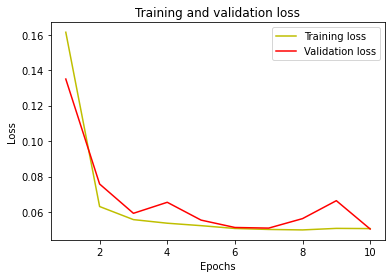

In [4]:
lst_train_img = os.listdir(data_path_train + '/images/')
lst_train_mask = os.listdir(data_path_train + '/labels/')
lst_test_img = os.listdir(data_path_test + '/images/')


imgs_train = []
masks_train = []
#X_test = []


for directory_path in glob.glob(data_path_train + '/images/'):
    for img_path in glob.glob(os.path.join(directory_path,'*.png')):
        #print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = resize(img, (height_shape, width_shape))
        imgs_train.append(img)
imgs_train = np.array(imgs_train)


for directory_path in glob.glob(data_path_train + '/labels/'):
    for mask_path in glob.glob(os.path.join(directory_path,'*.png')):
        print(mask_path)
        mask = cv2.imread(mask_path,0)
        mask = resize(mask, (height_shape, width_shape))
        masks_train.append(mask)
masks_train = np.array(masks_train)



X = imgs_train
y = masks_train
y = np.expand_dims(y, axis=3)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)
    
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)
    
    
model = sm.Unet(BACKBONE,encoder_weights='imagenet')
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['mse'])
print(model.summary())

history = model.fit(X_train,
                    y_train,
                    batch_size=8, 
                    epochs=10,
                    verbose=1,
                    validation_data =(X_test,y_test))

accuracy = model.evaluate(X_test, y_test)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


    



G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/validation/images/0001.png


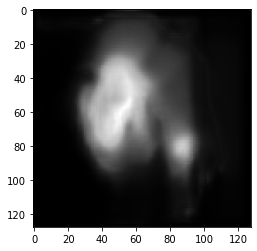

In [5]:
model.save('dfu.h5')
from tensorflow import keras
model = keras.models.load_model('dfu.h5', compile=False)
test_img = cv2.imread(data_path_test + '/images/0001.png', cv2.IMREAD_COLOR)
print(data_path_test + '/images/0001.png')
test_img = cv2.resize(test_img, (width_shape, height_shape))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')


G:/My Drive/IT 593A F21 Ana Pacheco/Data/MICCAI Foot Ulcer Segmentation/Foot Ulcer Segmentation Challenge/validation/images/001.png
